# Replicator Dynamics of an Asymetric Normal Form Game

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.ticker import AutoMinorLocator

## Parametrization

We first define the game and the payoff matrix

In [3]:
def payoff_matrix_a(x: float):
    return np.array([
        [0, -1], # T 
        [x, -2]  # B
    ])

payoff_matrix_B = np.array([
    [0, -1], # L
    [1, -2] # R
])

## Replicator Dynamics with 2 populations

$\dot{x}_i = x_i[f_{x_i}(\mathbf{y})-\sum_{j=1}^{n}x_jf_{x_j}(\mathbf{y})]$,

$\dot{y}_i = y_i[f_{y_i}(\mathbf{x})-\sum_{j=1}^{n}y_jf_{y_j}(\mathbf{x})]$,

$\dot{x}_i = x_i[(Ay)_i - x^TAy]$

$\dot{y}_i = y_i[(Bx)_i - y^TBx]$

In [9]:
def replicator_equation_asymmetric(x: np.ndarray,
                                   y: np.ndarray,
                                   payoffs: np.ndarray) -> np.ndarray:
    ay = np.dot(payoffs, y)
    return x * (ay - np.dot(x, ay))

In [10]:
def vectorized_replicator_equation_asymmetric(x: np.ndarray, y: np.ndarray, payoffs):
    return np.asarray([
        [replicator_equation_asymmetric(np.asarray([x[i, j], 1. - x[i, j]]),
                                        np.asarray([y[i, j], 1. - y[i, j]]),
                                        payoffs)[0] for j in range(x.shape[1])] 
            for i in range(x.shape[0])])

In [18]:
nb_points = 20
x_i = np.linspace(0, 1, num=nb_points, dtype=np.float64)
y_i = np.linspace(0, 1, num=nb_points, dtype=np.float64)

In [51]:
# Vector field for each possible \tau
X,Y = np.meshgrid(x_i, y_i)
U, V = [], []

X_matrix_values = [2, 0, -1]

for X_value in X_matrix_values:
    A = payoff_matrix_a(X_value)
    U.append(vectorized_replicator_equation_asymmetric(X, Y, A))
    V.append(vectorized_replicator_equation_asymmetric(X, Y, payoff_matrix_B).T)

## Plot gradient field

In [52]:
plt.rcParams.update({'font.size': 15})

/var/folders/w6/dxmf24ns6wxcr7kmwzsqvl2c0000gn/T/ipykernel_3766/3063532169.py:8: RuntimeWarning: invalid value encountered in divide
  ax.quiver(X, Y, U[i]/N, V[i]/N, M, units='width')


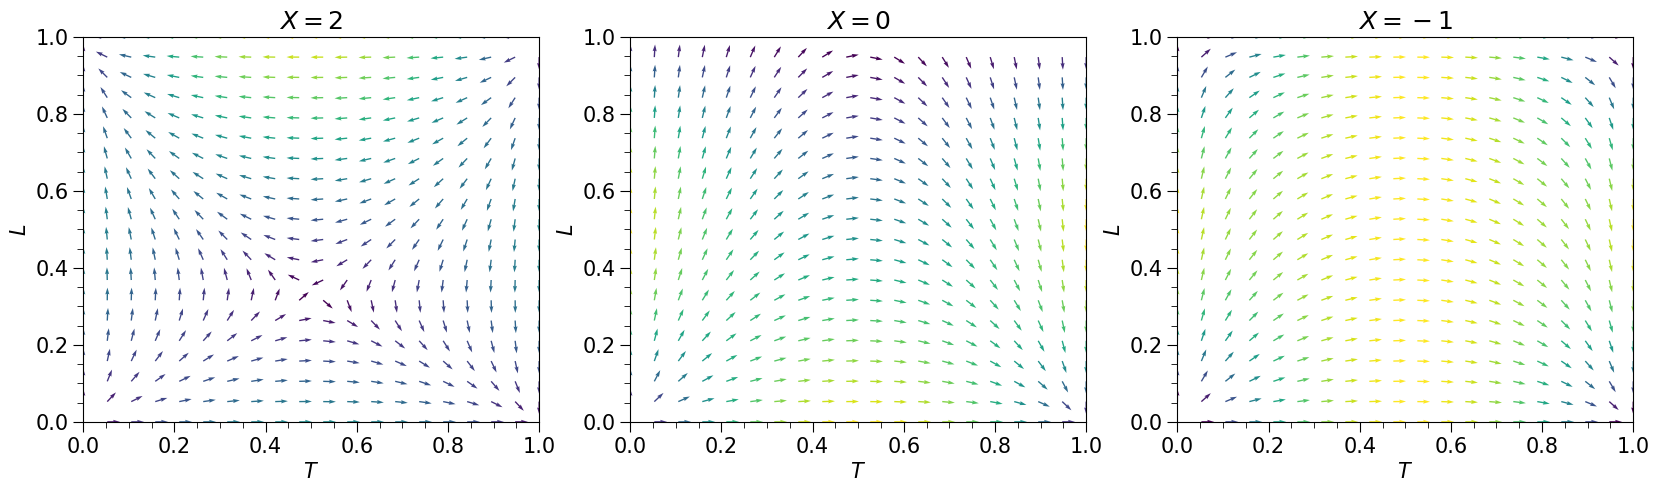

In [53]:
fig, axes = plt.subplots(nrows=1, ncols=len(X_matrix_values), figsize=(20, 5))

for i, ax in enumerate(axes):
    #Normalize arrows
    N = np.sqrt(U[i]**2 + V[i]**2)
    M = np.hypot(U[i], V[i])
    # plot vector field
    ax.quiver(X, Y, U[i]/N, V[i]/N, M, units='width')
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_title(r'$X=%i$' % X_matrix_values[i])
    ax.set_xlabel(r"$T$")
    ax.set_ylabel(r"$L$")   
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(which='major', length=7)
    ax.tick_params(which='minor', length=4)